In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import netCDF4 as nc
import geopandas as gpd
import dask
import dask.array as da
import xarray as xr
import csv
from scipy.spatial import KDTree
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime, timedelta

In [2]:
''' Coords of box '''
location = 9 # 0: Alatna, 1: Huslia, 

centers  = [[-153.65, 66.70], # Alatna (2, 3572)
            [-155.69, 66.01], # Huslia (2, 3612)
            [-157.01, 66.96], # (2, 3548)
            [-157.82, 65.81], # (2, 3630)
            [-158.34, 65.23], # (2, 3674)
            [-153.05, 67.12], # (2, 3537)
            [-152.30, 67.12], # (2, 3539)
            [-150.92, 66.71], # (2, 3568)
            [-146.44, 66.96], # (2, 3550) 
            [-153.26, 64.53]] # (2, 3728)

min_lon = centers[location][0] - .65
max_lon = centers[location][0] + .65
min_lat = centers[location][1] - .25
max_lat = centers[location][1] + .25

box_lon = np.array([min_lon, max_lon, max_lon, min_lon, min_lon])
box_lat = np.array([min_lat, min_lat, max_lat, max_lat, min_lat])

<IPython.core.display.Javascript object>


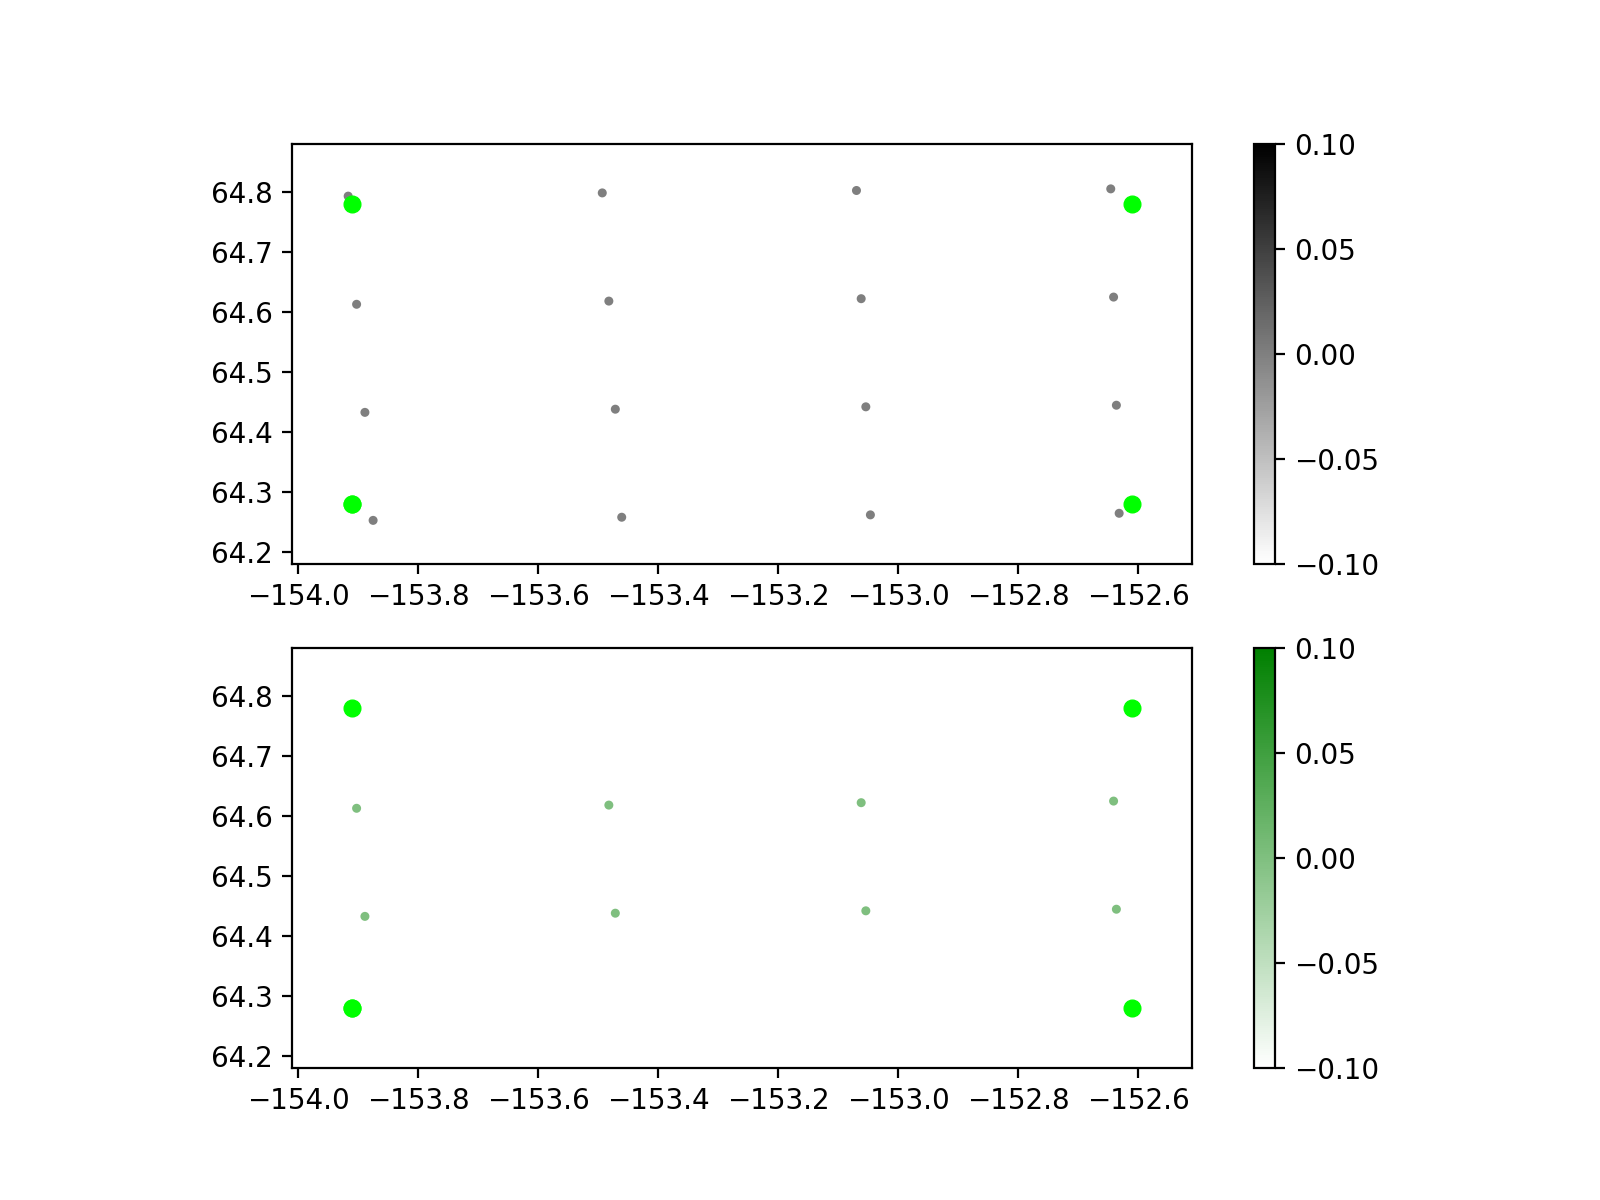

(64.18, 64.88)

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].set_xlim(min_lon - .1, max_lon + .1)
ax[0].set_ylim(min_lat - .1, max_lat + .1)

ax[1].set_xlim(min_lon - .1, max_lon + .1)
ax[1].set_ylim(min_lat - .1, max_lat + .1)

In [4]:
''' Get data '''
f = nc.Dataset("/Users/joshuamiller/Documents/SULI 2023/Data/Lightning/Alaska_lightning_1986-2017.nc", "r")

# Print the dimensions of the file
print(f.dimensions.keys())

# Print the variables in the file
print(f.variables.keys())

# Get the data for a variable
lat = f.variables["lat"] # Pointer to variable
lat = np.array(lat[:]) # : Extracts the numbers

lon = f.variables["lon"]
lon = np.array(lon[:])

time = f.variables["time"]
time = np.array(time[:])

strikes = f.variables["strikes"]
strikes = np.array(strikes[:])

# Close the file
f.close()

dict_keys(['time', 'y', 'x'])
dict_keys(['time', 'strikes', 'polar_stereographic', 'x', 'y', 'lat', 'lon'])


In [5]:
print("lat.shape=", np.shape(lat), "lon.shape=", np.shape(lon), "time.shape=", time.shape[0], "strikes.shape=", np.shape(strikes))

lat.shape= (262, 262) lon.shape= (262, 262) time.shape= 11688 strikes.shape= (11688, 262, 262)


In [6]:
''' Get points for the snow plot and box '''
points = [Point(xy) for xy in zip(lon.ravel(), lat.ravel())]
points_gdf = gpd.GeoDataFrame(geometry=points)

## Create a subset of the snow depth data inside a box

In [7]:
''' Corners of the box of interest '''

points_box = [Point(xy) for xy in zip(box_lon, box_lat)]
points_box_gdf = gpd.GeoDataFrame(geometry=points_box)

print(np.where(lat <= max(box_lat)), "||", np.where(lat == box_lat[2]), "||", np.shape(lat))

(array([  0,   0,   0, ..., 233, 234, 234]), array([  0,   1,   2, ..., 261,   0, 261])) || (array([], dtype=int64), array([], dtype=int64)) || (262, 262)


In [8]:
print(time)

print(datetime(1986, 1, 1) + timedelta(days=10957))
print(datetime(1986, 1, 1) + timedelta(days=11323))

[    0     1     2 ... 11685 11686 11687]
2016-01-01 00:00:00
2017-01-01 00:00:00


In [9]:
''' Create a dataframe for each time and extract the strikes depths inside the box'''
new_strikes = []
for t in range(10957, 11322):
    strikes_gdf = gpd.GeoDataFrame(geometry=points).assign(data=strikes[t, :, :].ravel())
    
    subset = strikes_gdf.cx[min(box_lon):max(box_lon), min(box_lat):max(box_lat)]
    
    new_strikes_gdf = gpd.GeoDataFrame(subset, geometry='geometry')
    
    new_strikes.append(np.array(new_strikes_gdf['data'].values))
    
    print("t=", t, "| DONE")

t= 10957 | DONE
t= 10958 | DONE
t= 10959 | DONE
t= 10960 | DONE
t= 10961 | DONE
t= 10962 | DONE
t= 10963 | DONE
t= 10964 | DONE
t= 10965 | DONE
t= 10966 | DONE
t= 10967 | DONE
t= 10968 | DONE
t= 10969 | DONE
t= 10970 | DONE
t= 10971 | DONE
t= 10972 | DONE
t= 10973 | DONE
t= 10974 | DONE
t= 10975 | DONE
t= 10976 | DONE
t= 10977 | DONE
t= 10978 | DONE
t= 10979 | DONE
t= 10980 | DONE
t= 10981 | DONE
t= 10982 | DONE
t= 10983 | DONE
t= 10984 | DONE
t= 10985 | DONE
t= 10986 | DONE
t= 10987 | DONE
t= 10988 | DONE
t= 10989 | DONE
t= 10990 | DONE
t= 10991 | DONE
t= 10992 | DONE
t= 10993 | DONE
t= 10994 | DONE
t= 10995 | DONE
t= 10996 | DONE
t= 10997 | DONE
t= 10998 | DONE
t= 10999 | DONE
t= 11000 | DONE
t= 11001 | DONE
t= 11002 | DONE
t= 11003 | DONE
t= 11004 | DONE
t= 11005 | DONE
t= 11006 | DONE
t= 11007 | DONE
t= 11008 | DONE
t= 11009 | DONE
t= 11010 | DONE
t= 11011 | DONE
t= 11012 | DONE
t= 11013 | DONE
t= 11014 | DONE
t= 11015 | DONE
t= 11016 | DONE
t= 11017 | DONE
t= 11018 | DONE
t= 11019

In [10]:
''' Extract the lat and lon values inside the box '''
new_lon  = np.array(new_strikes_gdf['geometry'].x.values)
new_lat  = np.array(new_strikes_gdf['geometry'].y.values)

print(len(new_lat), len(new_lon), min(new_lat), max(new_lat), min(new_lon), max(new_lon), np.shape(new_strikes))

print(new_lat, "| ", new_lon)

8 8 64.4327163696289 64.62486267089844 -153.90232849121094 -152.63601684570312 (365, 8)
[64.43271637 64.43800354 64.44197083 64.44462585 64.612854   64.61817932
 64.62218475 64.62486267] |  [-153.88847351 -153.47113037 -153.05361938 -152.63601685 -153.90232849
 -153.48191833 -153.06135559 -152.64068604]


In [11]:
''' Reshape into a grid to match the dots in the resulting figure '''
'''
xdim = 38
ydim = int(len(new_lat) / 38)

new_lat  = np.reshape(new_lat, (xdim, ydim)) # 38 b/c counted the width manually
new_lon  = np.reshape(new_lon, (xdim, ydim))
new_strikes = np.reshape(new_strikes, (np.shape(new_strikes)[0], xdim, ydim))

print(np.shape(new_lat), np.shape(new_lon), np.shape(new_strikes))
'''

'\nxdim = 38\nydim = int(len(new_lat) / 38)\n\nnew_lat  = np.reshape(new_lat, (xdim, ydim)) # 38 b/c counted the width manually\nnew_lon  = np.reshape(new_lon, (xdim, ydim))\nnew_strikes = np.reshape(new_strikes, (np.shape(new_strikes)[0], xdim, ydim))\n\nprint(np.shape(new_lat), np.shape(new_lon), np.shape(new_strikes))\n'

## Save this subset of the data as a .nc file

In [12]:
strikes_files = ['/Users/joshuamiller/Documents/SULI 2023/Data/Alatna_Box/Lightning/Strikes_2016_1_1-2016_12_31_Alatna_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Huslia_Box/Lightning/Strikes_2016_1_1-2016_12_31_Huslia_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc1/Lightning/Strikes_2016_1_1-2016_12_31_Loc1_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc2/Lightning/Strikes_2016_1_1-2016_12_31_Loc2_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc3/Lightning/Strikes_2016_1_1-2016_12_31_Loc3_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc4/Lightning/Strikes_2016_1_1-2016_12_31_Loc4_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc5/Lightning/Strikes_2016_1_1-2016_12_31_Loc5_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc6/Lightning/Strikes_2016_1_1-2016_12_31_Loc6_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc7/Lightning/Strikes_2016_1_1-2016_12_31_Loc7_subset_v100.nc',
                 '/Users/joshuamiller/Documents/SULI 2023/Data/Loc8/Lightning/Strikes_2016_1_1-2016_12_31_Loc8_subset_v100.nc']

In [13]:
''' Create an nc file of the new_snow data '''
#ncfile.close()
ncfile = nc.Dataset(strikes_files[location], 'w', format='NETCDF4')

# Create dimensions
ncfile.createDimension('time', np.shape(new_strikes)[0])
ncfile.createDimension('x', len(new_lat))

# Create variables
lat_var = ncfile.createVariable('lat', 'f4', ('x',))
lon_var = ncfile.createVariable('lon', 'f4', ('x',))
time_var = ncfile.createVariable('time', 'i4', ('time',))
strikes_var = ncfile.createVariable('strikes', 'f4', ('time','x'))

lat_var.setncattr('dimensions', 'x')
lon_var.setncattr('dimensions', 'x')
time_var.setncattr('dimensions', 'time')
strikes_var.setncattr('dimensions', 'x' 'time')

# Assign values to variables
lat_var[:] = new_lat
lon_var[:] = new_lon
time_var[:] = np.arange(0, np.shape(new_strikes)[0])
strikes_var[:] = new_strikes

# Add variable attributes
lat_var.units = 'degrees north'
lon_var.units = 'degrees east'
time_var.units = 'days since 2016-01-01 00:00:0.0'
strikes_var.units = 'number'

# Close the file
#ncfile.close()

In [14]:
''' Open to make sure it worked '''
f = nc.Dataset(strikes_files[location], "r")

# Print the dimensions of the file
print(f.dimensions.keys())

# Print the variables in the file
print(f.variables.keys())

f.close()

dict_keys(['time', 'x'])
dict_keys(['lat', 'lon', 'time', 'strikes'])


## Make the plot

In [15]:
''' Plot Alaska outline '''
ak = gpd.read_file("/Users/joshuamiller/Desktop/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

In [16]:
date = 1

In [17]:
norm = Normalize(vmin=0, vmax=max(strikes[date, :, :].ravel()))
cmap = LinearSegmentedColormap.from_list('custom', ['white', 'black'], N=200) # Higher N=more smooth

In [18]:
new_strikes_norm = Normalize(vmin=0, vmax=max(new_strikes[date].ravel()))
new_strikes_cmap = LinearSegmentedColormap.from_list('custom', ['white', 'green'], N=200) # Higher N=more smooth

In [19]:
ak.plot(ax=ax[0], color='white', edgecolor='black', linewidth=0.1, alpha=1, legend=True) # GOOD lots the map

plt.draw()

In [20]:
strikes_gdf = gpd.GeoDataFrame(geometry=points).assign(data=strikes[date, :, :].ravel())

strikes_gdf.plot(ax=ax[0], column='data', cmap=cmap, norm=norm, markersize=5, alpha=1, legend=True) # GOOD

plt.draw()

In [21]:
subset = strikes_gdf.cx[min(box_lon):max(box_lon), min(box_lat):max(box_lat)]
new_strikes_gdf = gpd.GeoDataFrame(subset, geometry='geometry')

new_strikes_norm = Normalize(vmin=0, vmax=max(new_strikes_gdf['data'].values))
new_strikes_cmap = LinearSegmentedColormap.from_list('custom', ['white', 'green'], N=200) # Higher N=more smooth

new_strikes_gdf.plot(ax=ax[1], column='data', cmap=new_strikes_cmap, norm=new_strikes_norm, markersize=5, alpha=1, legend=True)

plt.draw()

In [22]:
points_box_gdf.plot(ax=ax[0], color='lime', edgecolor='lime', linewidth=.5, alpha=1)
points_box_gdf.plot(ax=ax[1], color='lime', edgecolor='lime', linewidth=.5, alpha=1)

plt.draw()